## Problem Statement
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months

## Hypothesis Generation

We will start with the first step, i.e. Hypothesis Generation.Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation.

1. There will be always increase in traffic as years passes by
2. There will be increase in traffic in summer as people like to travel to cold places
3. Weekdays Traffic will be more than weekend traffic due to official travel
4. Traffic will be high during Peak hours

# After making our hypothesis, we will try to validate them. 

###  Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pandas import Series
from datetime import datetime 

In [2]:
# read data
train = pd.read_csv("Train_SU63ISt.csv", sep = ",", engine = 'python')
test = pd.read_csv("Test_0qrQsBZ.csv", sep = ",", engine = 'python')

# Lets make a copy so that we can reference the original dataset later

train_original = train.copy()
test_original = test.copy()

In [3]:
# Let's inspect the various aspects of train dataset

print(train.shape,"\n")
print(train.info(),"\n")
print(train.head())

(18288, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB
None 

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [4]:
# Let's inspect the various aspects of test dataset

print(test.shape,"\n")
print(test.info(),"\n")
print(test.head())

(5112, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB
None 

      ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00


In [5]:
# Lets check the missing value
print(train.isnull().sum())
print(test.isnull().sum())

ID          0
Datetime    0
Count       0
dtype: int64
ID          0
Datetime    0
dtype: int64


## Feature Extraction

In [6]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test['Count'] = 0

train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Count'] = 0

In [7]:
for i in (train, test, train_original,test_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
    i['minute']=i.Datetime.dt.minute
    i['second']=i.Datetime.dt.second

In [8]:
# Now Lets again look at initial rows of the train and test data

print(train.head(),"\n")
print(test.head())

   ID            Datetime  Count  year  month  day  Hour  minute  second
0   0 2012-08-25 00:00:00      8  2012      8   25     0       0       0
1   1 2012-08-25 01:00:00      2  2012      8   25     1       0       0
2   2 2012-08-25 02:00:00      6  2012      8   25     2       0       0
3   3 2012-08-25 03:00:00      2  2012      8   25     3       0       0
4   4 2012-08-25 04:00:00      2  2012      8   25     4       0       0 

      ID            Datetime  Count  year  month  day  Hour  minute  second
0  18288 2014-09-26 00:00:00      0  2014      9   26     0       0       0
1  18289 2014-09-26 01:00:00      0  2014      9   26     1       0       0
2  18290 2014-09-26 02:00:00      0  2014      9   26     2       0       0
3  18291 2014-09-26 03:00:00      0  2014      9   26     3       0       0
4  18292 2014-09-26 04:00:00      0  2014      9   26     4       0       0


In [9]:
# Now lets look at the unique value

for i in list(train):
    print(i)
    print(train[i].unique())

ID
[    0     1     2 ... 18285 18286 18287]
Datetime
['2012-08-25T00:00:00.000000000' '2012-08-25T01:00:00.000000000'
 '2012-08-25T02:00:00.000000000' ... '2014-09-25T21:00:00.000000000'
 '2014-09-25T22:00:00.000000000' '2014-09-25T23:00:00.000000000']
Count
[   8    2    6    4   10   14   36   12   20   16   30   58   18   24
   28   32   22   38   26   46   34   40   68   52   84   56   44   50
   80  200  188  140   98   76  116   64   42   66   74   48   54   60
   62   72   78  136   94   82  126  104  110   86   92   88  106   90
   70   96  100  146  122  118  102  108  128  174  112  134  114  156
  396  160  148  138  142  176  150  158  152  124  120  286  216  166
  194  132  130  162  170  144  182  180  226  172  206  208  154  184
  222  224  228  230  178  164  168  196  220  186  202  232  212  598
  732  288  250  192  198  218  252  258  242  234  204  190  266  356
  338  282  236  296  244  210  458  342  254  328  326  264  248  324
  330  260  272  214  308  298

In [10]:
# From above , we can see that year are 2012, 2013 and 2014. Minute and second data are not present so we can remove it.

for i in (train, test, train_original, test_original):
    i=i.drop(['minute','second'], axis = 1, inplace = True)

In [11]:
# Now lets again look at the unique value

for i in list(train):
    print(i)
    print(train[i].unique())

ID
[    0     1     2 ... 18285 18286 18287]
Datetime
['2012-08-25T00:00:00.000000000' '2012-08-25T01:00:00.000000000'
 '2012-08-25T02:00:00.000000000' ... '2014-09-25T21:00:00.000000000'
 '2014-09-25T22:00:00.000000000' '2014-09-25T23:00:00.000000000']
Count
[   8    2    6    4   10   14   36   12   20   16   30   58   18   24
   28   32   22   38   26   46   34   40   68   52   84   56   44   50
   80  200  188  140   98   76  116   64   42   66   74   48   54   60
   62   72   78  136   94   82  126  104  110   86   92   88  106   90
   70   96  100  146  122  118  102  108  128  174  112  134  114  156
  396  160  148  138  142  176  150  158  152  124  120  286  216  166
  194  132  130  162  170  144  182  180  226  172  206  208  154  184
  222  224  228  230  178  164  168  196  220  186  202  232  212  598
  732  288  250  192  198  218  252  258  242  234  204  190  266  356
  338  282  236  296  244  210  458  342  254  328  326  264  248  324
  330  260  272  214  308  298

In [12]:
# Getting Weekend data

train['day of week']=train['Datetime'].dt.dayofweek 
train['weekend'] = train['day of week'].apply(lambda x: 1 if x == 5 or x == 6 else 0)



## Visualising the Data


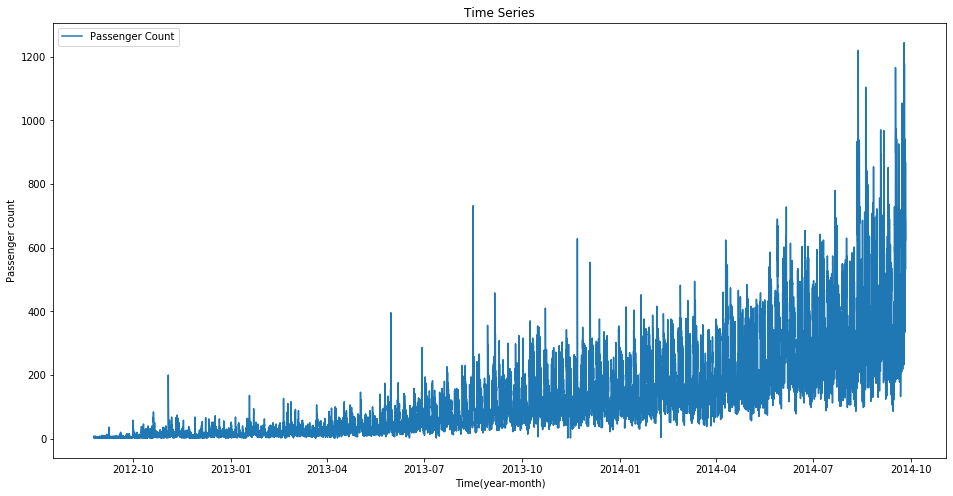

In [13]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Lets recall the hypothesis that we made earlier:

-  Traffic will increase as the years pass by
-  Traffic will be high in summer time
-  Traffic on weekdays will be more
-  Traffic during the peak hours will be high

we will now try to validate our hypothesis and make other inferences from the dataset.

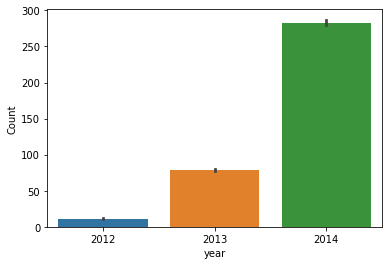

In [14]:
sns.barplot(x='year', y='Count', data=train)
plt.show()


From above graph, we can clearly see that traffic is increasing which validates our first hypothesis

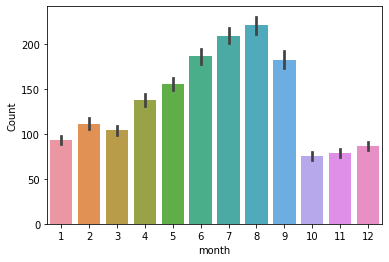

In [15]:
sns.barplot(x='month', y='Count', data=train)
plt.show()


From above graph, we can clearly see that traffic is more in summer than winter and it validates our second hypothesis

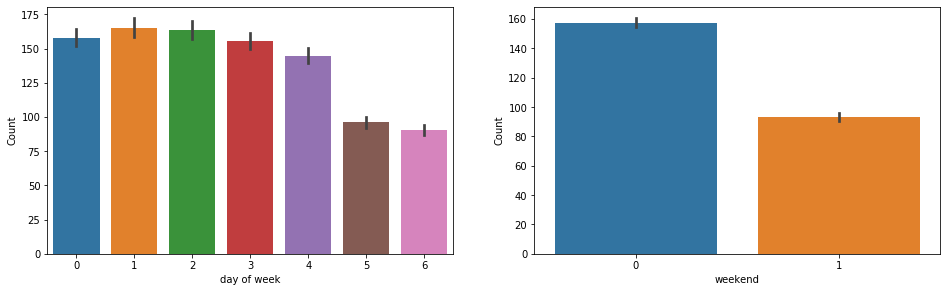

In [16]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
sns.barplot(x='day of week', y='Count', data=train)

plt.subplot(2,2,2)
sns.barplot(x='weekend', y='Count', data=train)
plt.show()


From above graphs, we can clearly see that traffic is more in weekdays than weekends that validates our third hypothesis

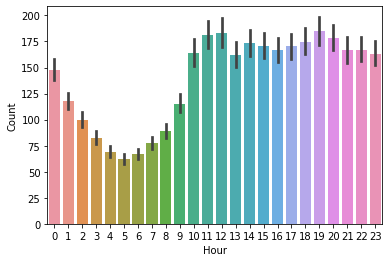

In [17]:
sns.barplot(x='Hour', y='Count', data=train)
plt.show()

From above graph, we can clearly see that traffic is more in peakhours so it validates our fourth hypothesis

In [18]:
# Dropping ID variable
train=train.drop('ID',axis = 1)

# Lets aggregate the hourly time series to daily, weekly and monthly time series.

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

<Figure size 1152x720 with 0 Axes>

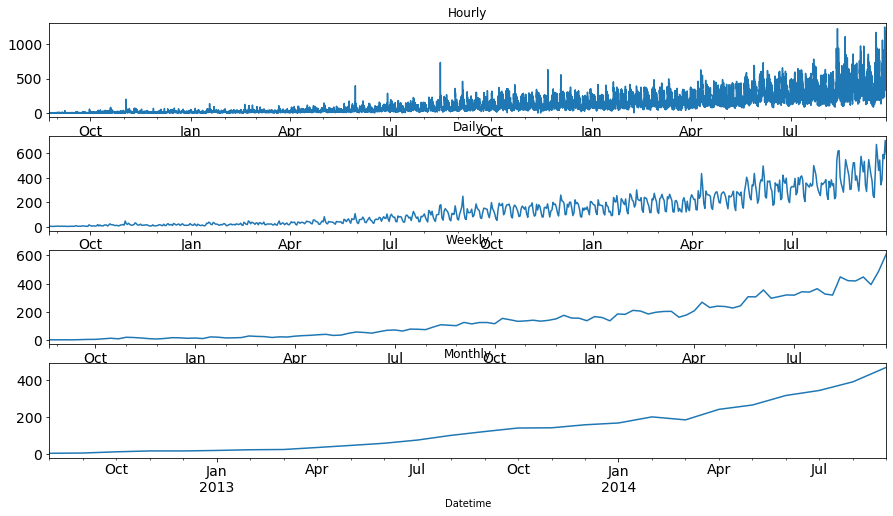

In [19]:
plt.figure(figsize = (16,10))

# Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1) 

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])


### We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis. But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [20]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 

# Converting to daily mean 
train = train.resample('D').mean()


test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 



In [21]:
# Let's split the data into train and validataion part. we will take last 3 months as the validation data.
# The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.


Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

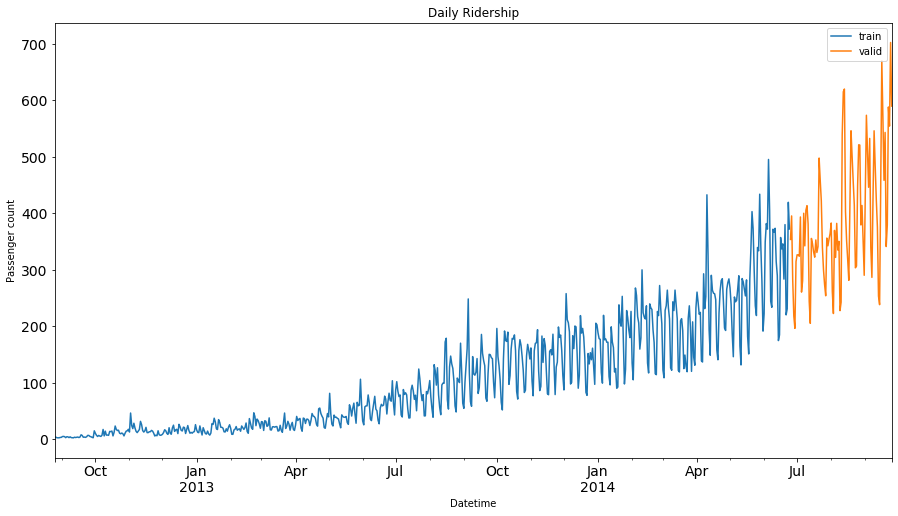

In [22]:
# Now we will look at how the train and validation part has been divided.

Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

### Naive Approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction

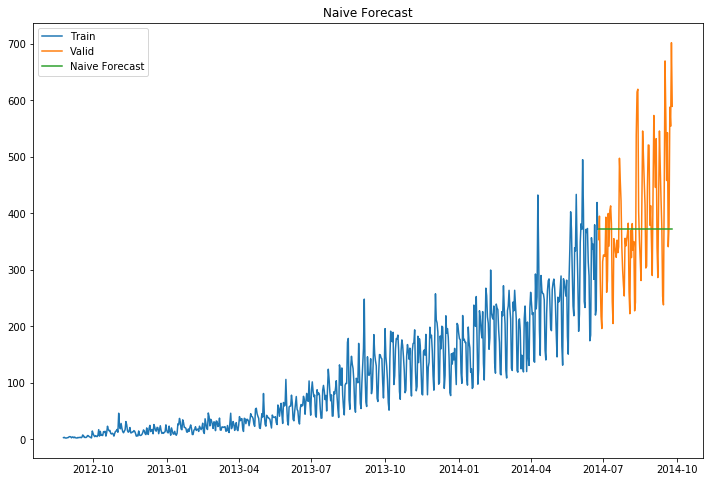

In [23]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [24]:
# We will now calculate RMSE to check the accuracy of our model on validation data set.

from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


#### From above, we can see that this is not clearly a good model 

### Moving Average

In this forecasting technique, we will take the average of the passenger counts for last few time periods only

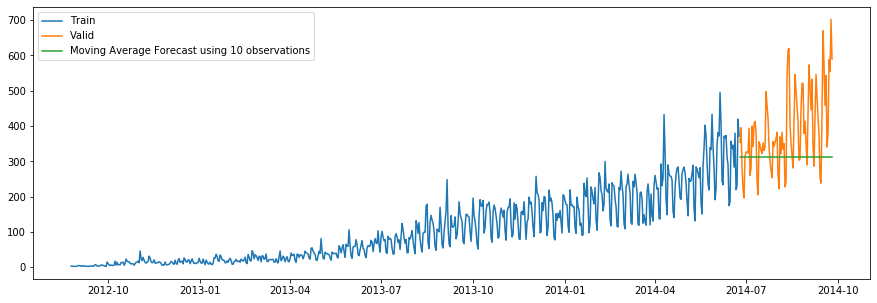

Root Mean Square Error for 10 observations:  134.23733308950264


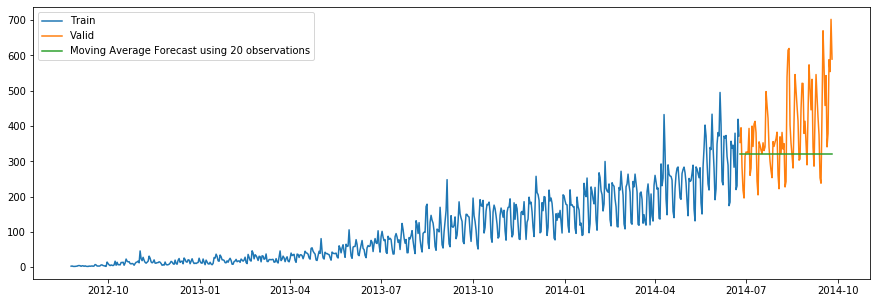

Root Mean Square Error for 20 observations:  130.44984977550422


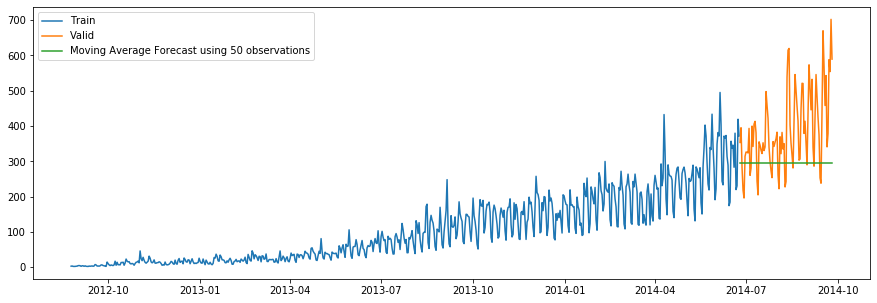

Root Mean Square Error for 50 observations:  144.19175679986802


In [25]:
# Lets try the rolling mean for last 10, 20, 50 days and visualize the results.


# Moving Average Forecast using 10 observations

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast_10_obv'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast_10_obv'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
print("Root Mean Square Error for 10 observations: ",sqrt(mean_squared_error(valid.Count, y_hat_avg['moving_avg_forecast_10_obv'])))


# Moving Average Forecast using 20 observations
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast_20_obv'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast_20_obv'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()
print("Root Mean Square Error for 20 observations: ",sqrt(mean_squared_error(valid.Count, y_hat_avg['moving_avg_forecast_20_obv'])))


# Moving Average Forecast using 50 observations
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast_50_obv'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast_50_obv'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

print("Root Mean Square Error for 50 observations: ",sqrt(mean_squared_error(valid.Count, y_hat_avg['moving_avg_forecast_50_obv'])))

 #### We can see that the predictions are getting weaker as we increase the number of observations

### Simple Exponential Smoothing
-  In this technique, we assign larger weights to more recent observations than to observations from the distant past.
-  The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations

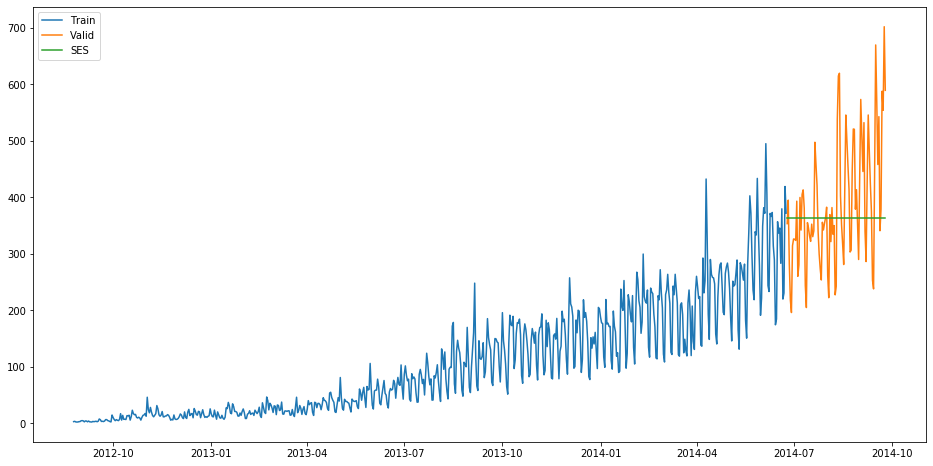

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

y_hat_avg = valid.copy() 
model_ses = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = model_ses.forecast(len(valid)) 

plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [27]:
# We will now calculate RMSE to check the accuracy of our model on validation data set.

rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


#### We can infer that the fit of the model has improved as the rmse value has reduced.

## Holt’s Linear Trend Model
-  It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
-  This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

<Figure size 1440x864 with 0 Axes>

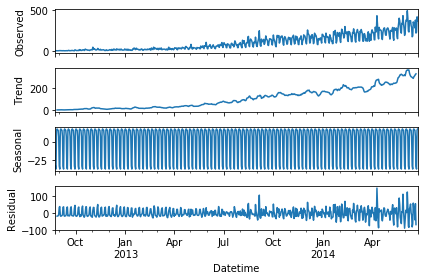

In [28]:
import statsmodels.api as sm

plt.figure(figsize = (20,12))
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

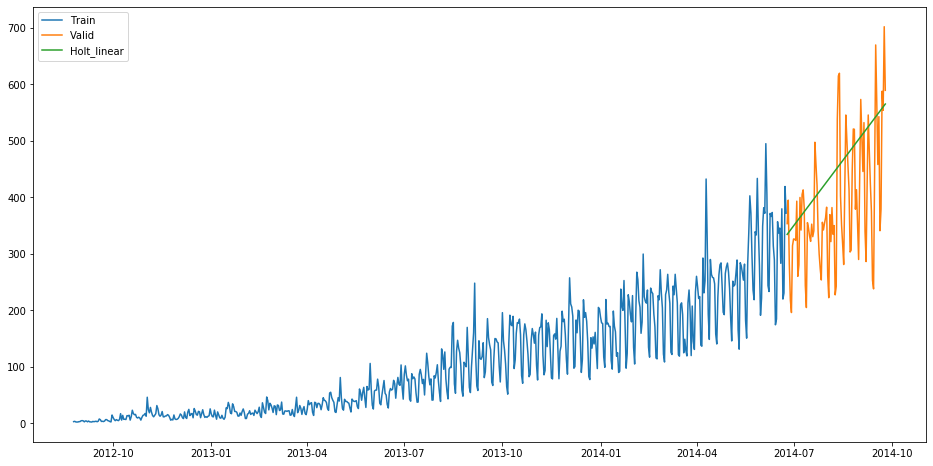

In [29]:
# An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

y_hat_avg = valid.copy() 
model_holt = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = model_holt.forecast(len(valid)) 


plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [30]:
# We can see an inclined line here as the model has taken into consideration the trend of the time series.

# Let’s calculate the rmse of the model.

rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)


112.94278345314041


#### From above, we can see that rmse value has decreased.


## Predictions on the Test Set
-  Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
-  We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
-  We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.

In [31]:
# Let’s make prediction for the test dataset.
predict=model_holt.forecast(len(test))

# Let’s save these predictions in test file in a new column.
test['prediction']=predict

In [32]:
# Remember this is the daily predictions. We have to convert these predictions to hourly basis. 

# Calculating the hourly ratio of count 

train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

# Grouping the hourly ratio 
temp=train_original.groupby(['Hour'])['ratio'].sum() 

# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

In [33]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']
 

In [34]:
# We will now calculate RMSE 

rms = sqrt(mean_squared_error(test.Count, test.prediction)) 
print(rms)

620.0122220917934


Holt’s linear model gave rmse value of 620 in test data set

## Holt winter’s model

-  Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

-  The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

-  One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.





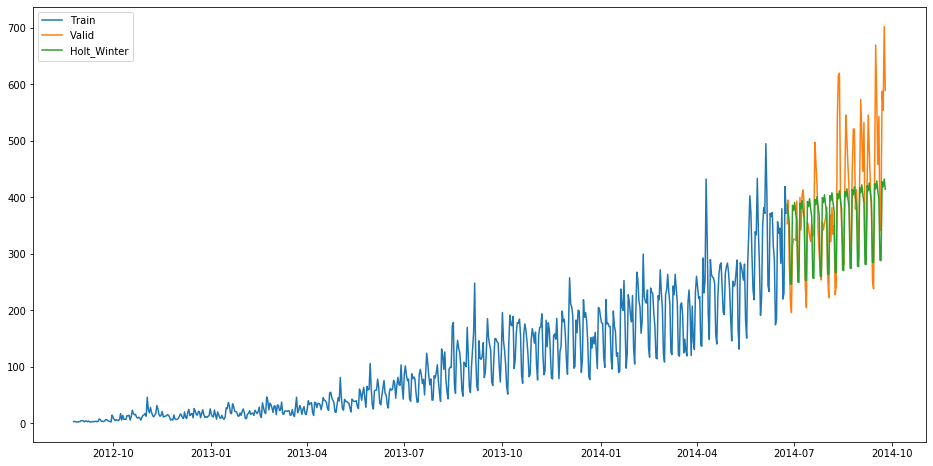

In [35]:
# Let’s first fit the model on training dataset and validate it using the validation dataset.

y_hat_avg = valid.copy() 
model_holtwinter = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = model_holtwinter.forecast(len(valid)) 


plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [36]:
# We will now calculate RMSE 

rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.37571191747172


In [37]:
# We can see that the rmse value has reduced a lot from this method. 
# Let’s forecast the Counts for the entire length of the Test dataset.

predict=model_holtwinter.forecast(len(test))

test['prediction']=predict

# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

# We will now calculate RMSE 

rms = sqrt(mean_squared_error(test.Count, test.prediction)) 
print(rms)

395.7913344695805


#### rmse value has been decreased but it is still very high. Now we will check ARIMA Model for time series forecasting

## ARIMA Model

-  <b>ARIMA </b> stands for <b> Auto-Regressive Integrated Moving Averages</b>. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

-  <b>Number of AR (Auto-Regressive) terms (p):</b> AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
-  <b> Number of MA (Moving Average) terms (q):</b> MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
-  <b> Number of Differences (d): </b> These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results

## Parameter tuning for ARIMA Model
### Stationarity Check
-  We will use Dickey Fuller test to check the stationarity of the series.
-  The intuition behind this test is that it determines how strongly a time series is defined by a trend.
-  The null hypothesis of the test is that time series is not stationary.
-  The alternate hypothesis is that the time series is stationary

In [38]:
#  Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

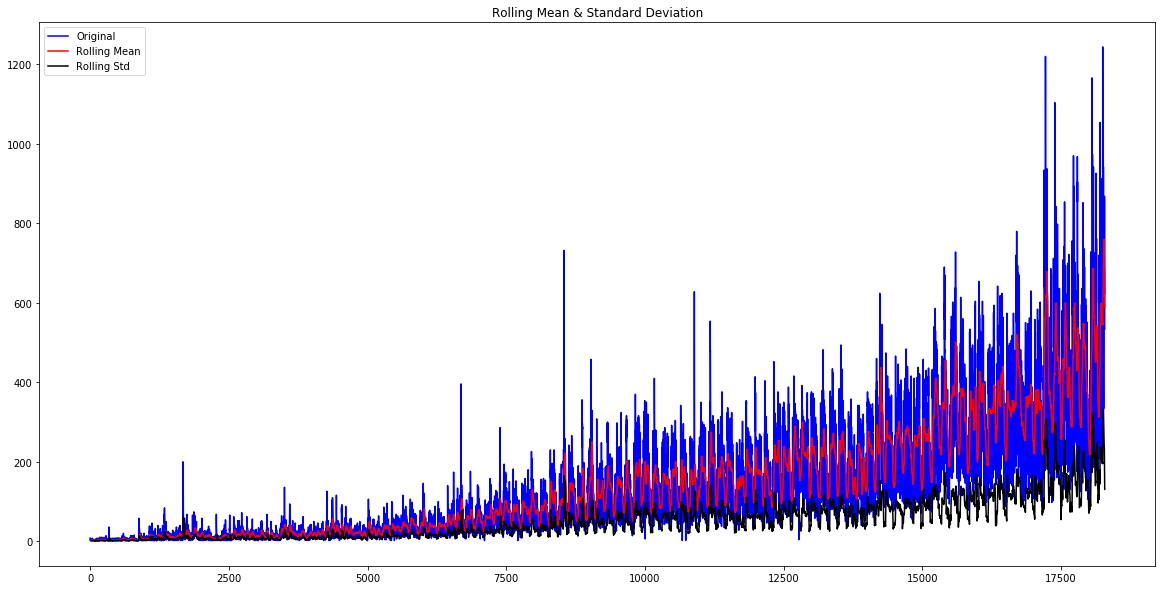

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [39]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

Test statistic is less than the critical values so the Time series is stationary but we can see increasing trend in the data. Note that the signed values should be compared and not the absolute values.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals



## Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here.

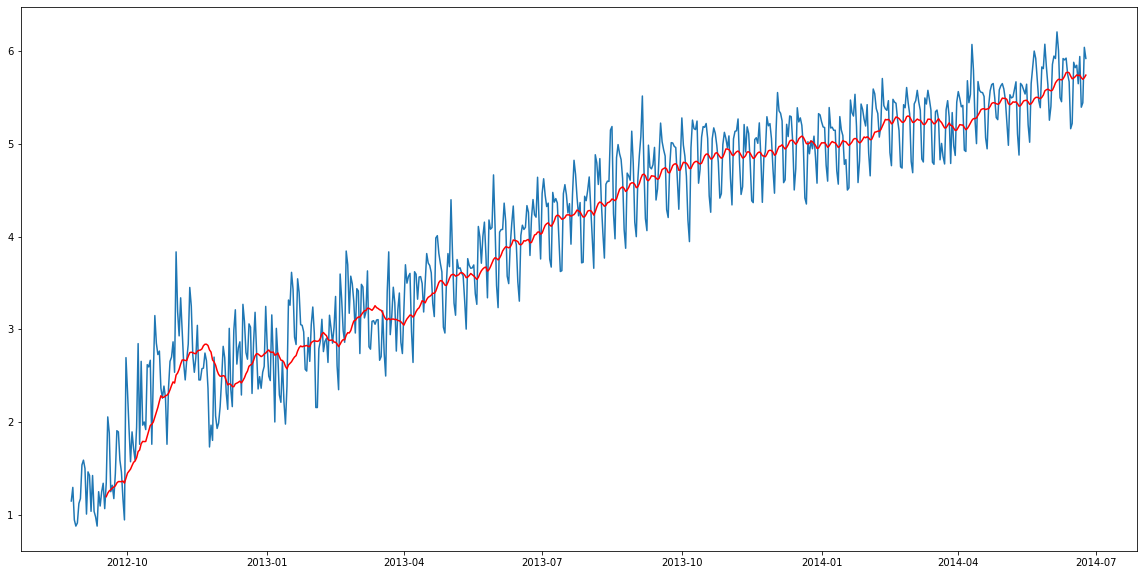

In [40]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()

plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

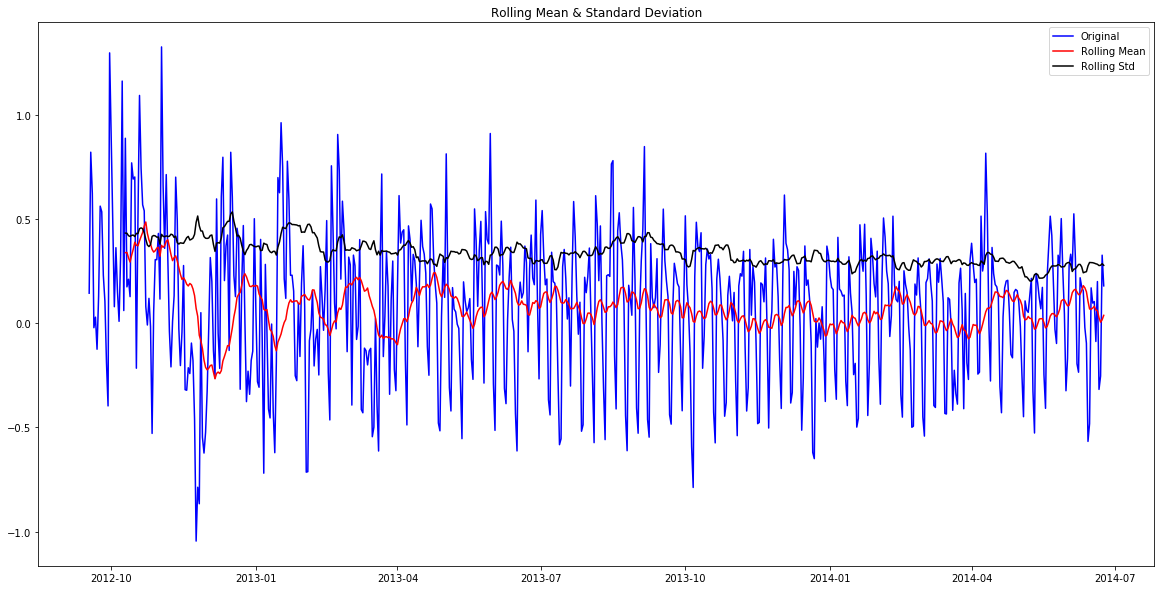

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [41]:
# So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

train_log_moving_avg_diff = Train_log - moving_avg

# Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

This looks like a much better series.The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

-  Differencing can help to make the series stable and eliminate the trend

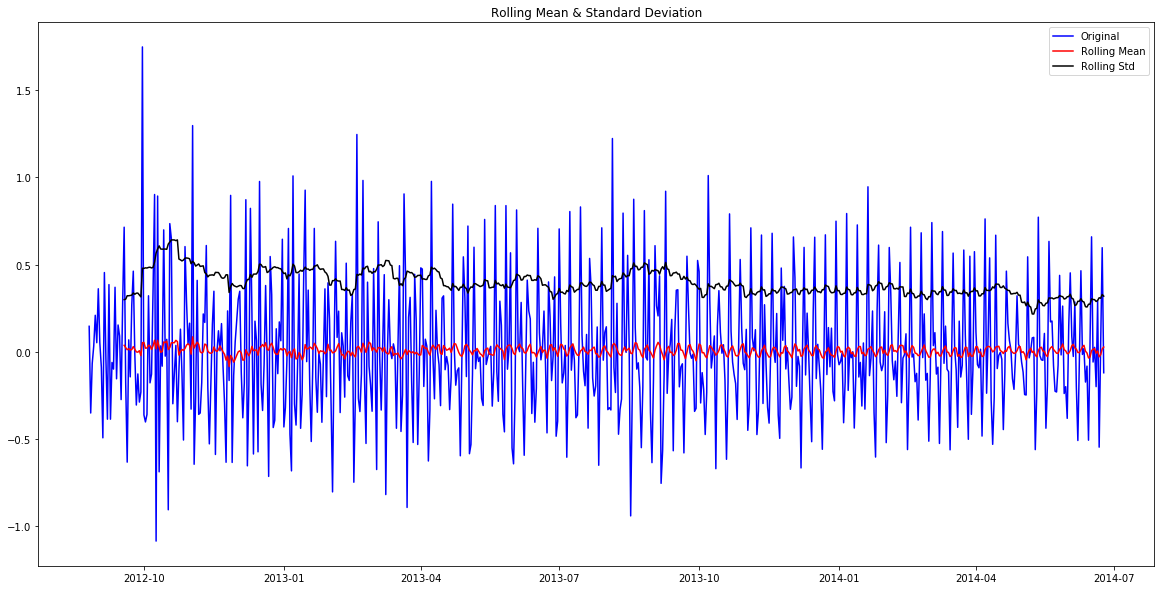

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [42]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 1% critical value, thus the TS is stationary with 99% confidence.

## Eliminating Seasonality

-  By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
-  Seasonality is always of a fixed and known period.
-  We will use seasonal decompose to decompose the time series into trend, seasonality and residuals


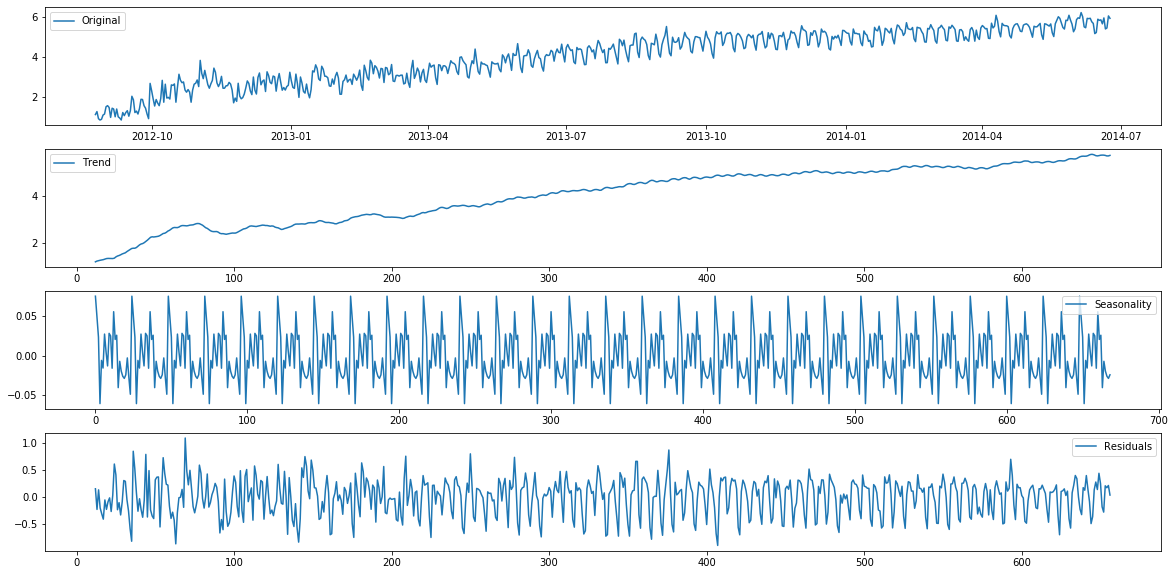

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.show()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. 

### Lets check stationarity of residuals



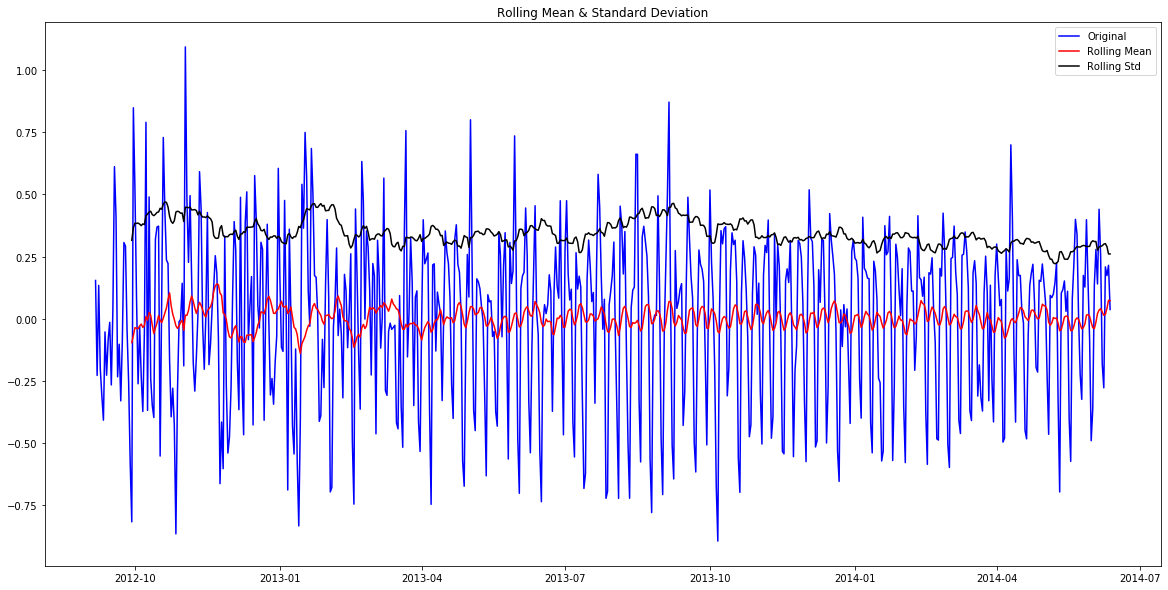

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [44]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.

## Forecasting the time series using ARIMA

-  First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

-  To find the optimized values of these parameters, we will use <b> ACF(Autocorrelation Function)</b> and <b> PACF(Partial Autocorrelation Function) </b> graph.

-  <b> ACF </b> is ais a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points)

-  <b> PACF </b> measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4

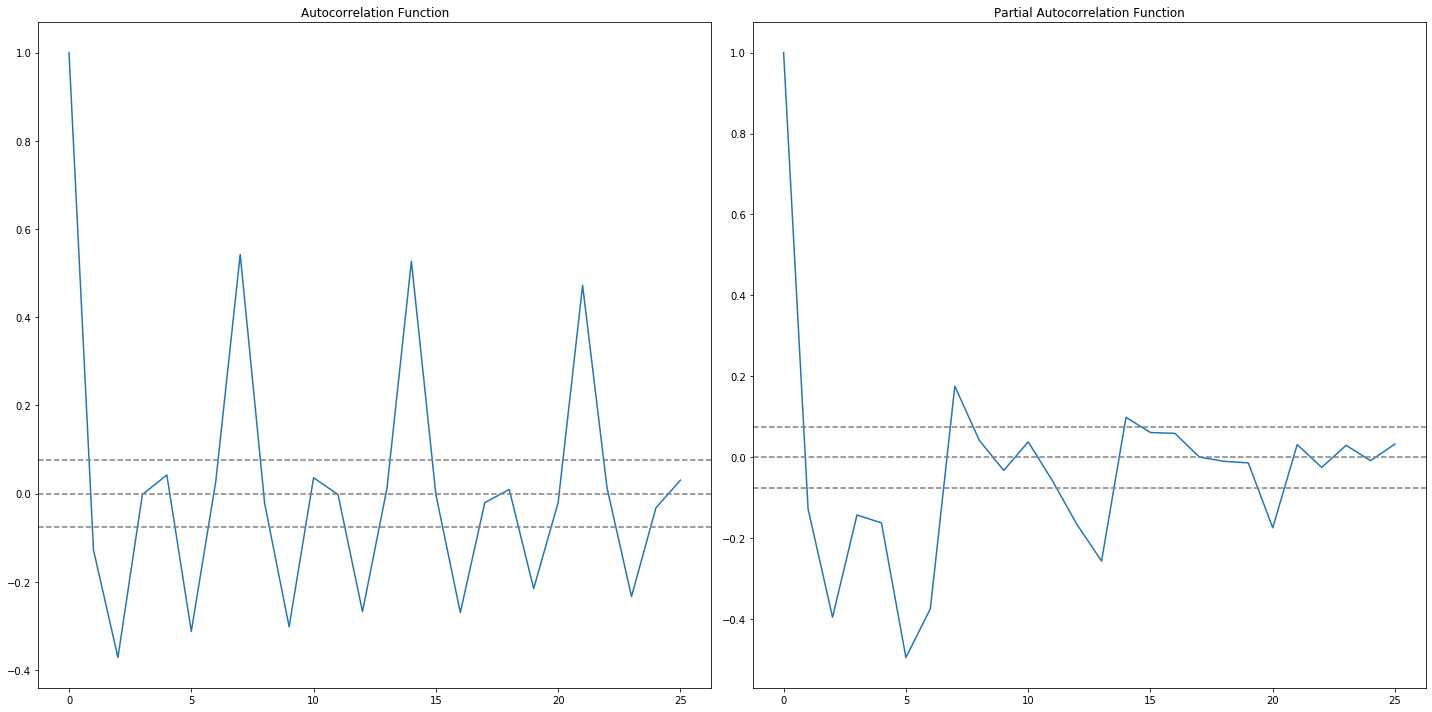

In [45]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


### In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

-  p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1
-  q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1

### Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.



## AR model
The autoregressive model specifies that the output variable depends linearly on its own previous values

Text(0.5, 1.0, 'RSS: 84.0207')

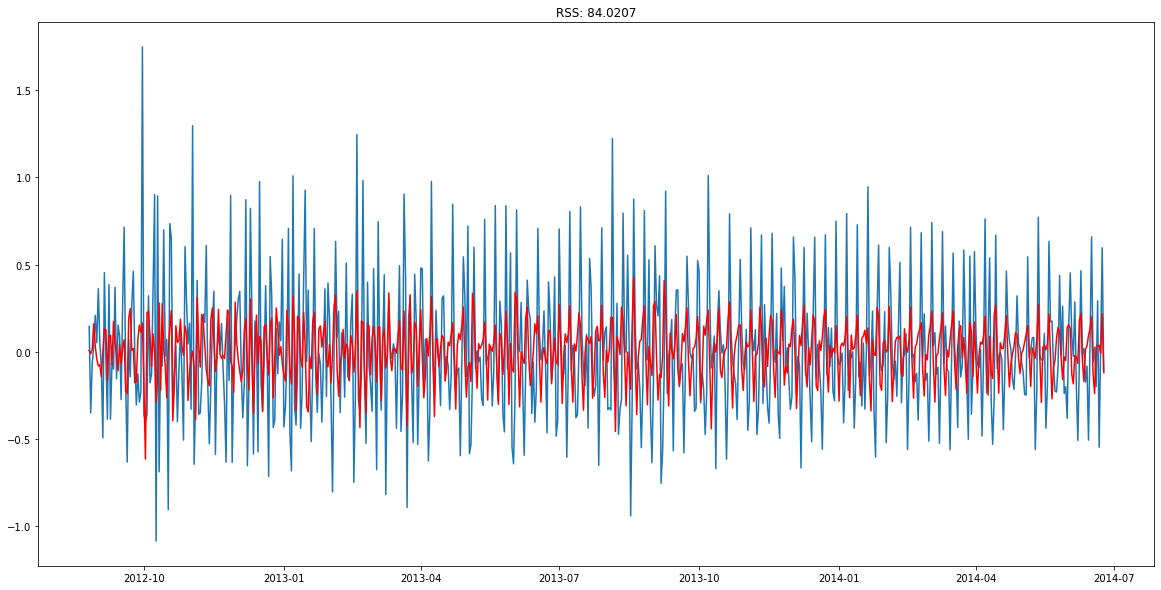

In [46]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),label = 'original')
plt.plot(results_AR.fittedvalues, color='red', label = 'predictions')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_log_diff.dropna())**2))

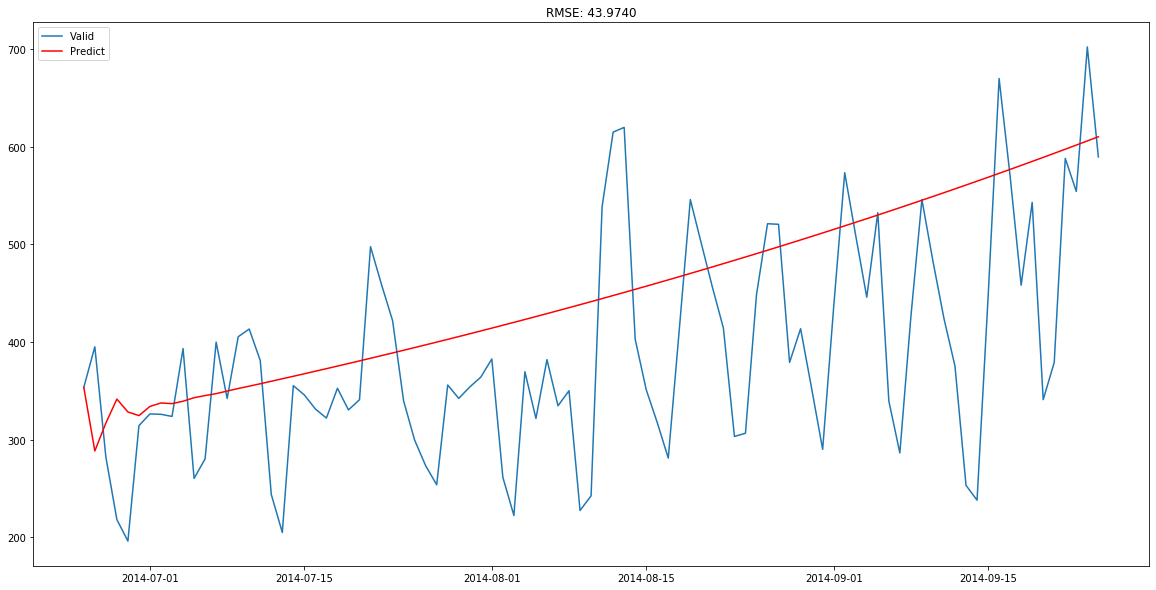

In [47]:
# Lets plot the validation curve for AR model.
# We have to change the scale of the model to the original scale.
# First step would be to store the predicted results as a separate series and observe it.

AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

## MA Model

The moving-average model specifies that the output variable depends linearly on the current and various past values.

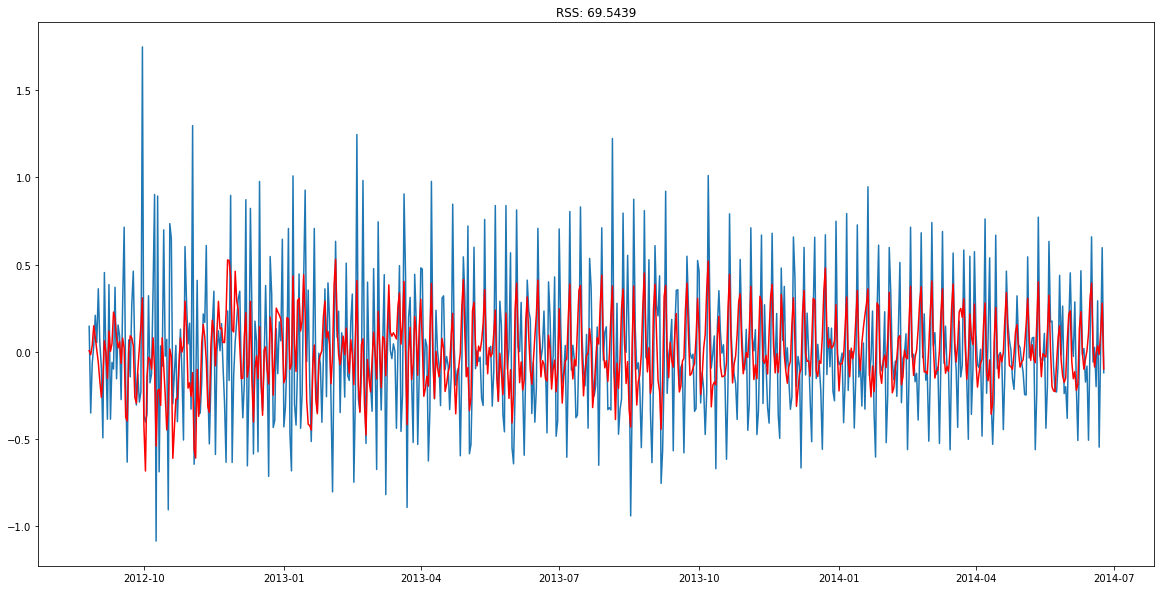

In [48]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),label = 'original')
plt.plot(results_MA.fittedvalues, color='red', label = 'prediction')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-train_log_diff.dropna())**2))
plt.show()

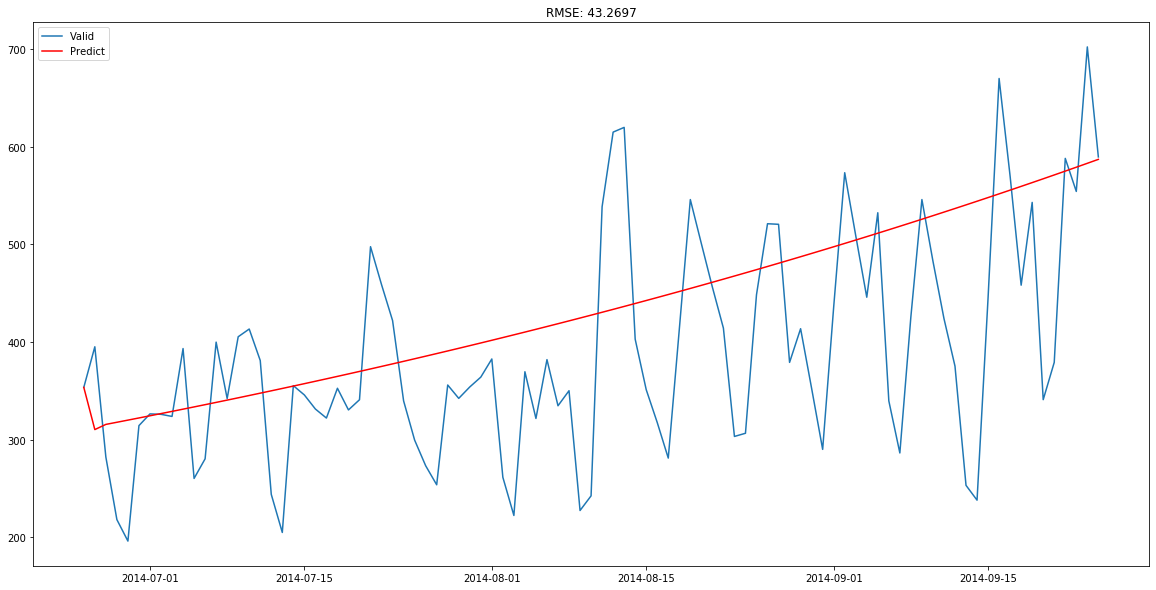

In [49]:
# Lets plot the validation curve for MA model just like AR Model
# We have to change the scale of the model to the original scale.
# First step would be to store the predicted results as a separate series and observe it.

MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25") 
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

## Combined Model

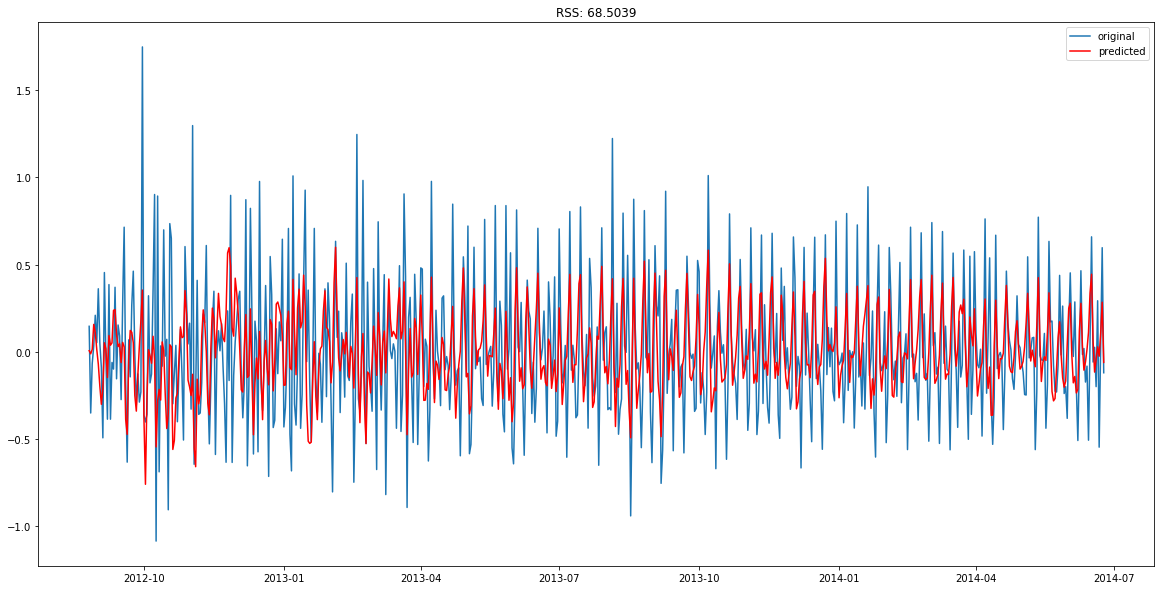

In [50]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train_log_diff.dropna())**2))
plt.show()

Here we can see that the MA models RSS is less than AR model and combined model RSS is less than MA so we can say that combined is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

### Taking it back to original scale
Since the combined model gave best result, lets scale it back to the original values and see how well it performs there

In [51]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()
    
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()    

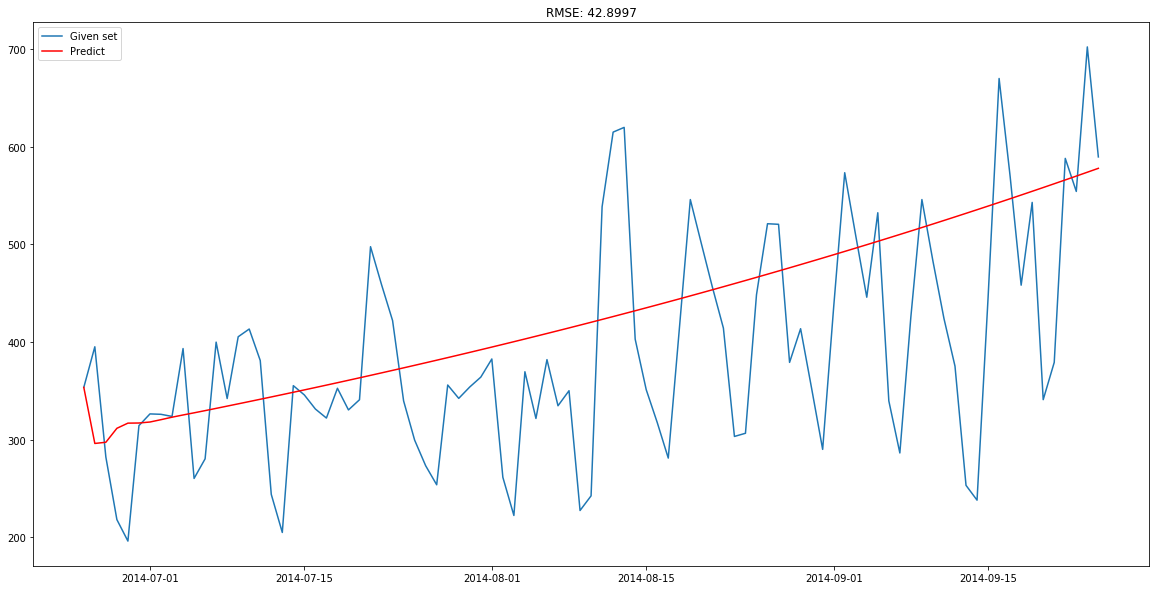

In [52]:
# Let’s predict the values for validation set.

ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

check_prediction_diff(ARIMA_predict_diff, valid)

## SARIMAX model on daily time series
SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

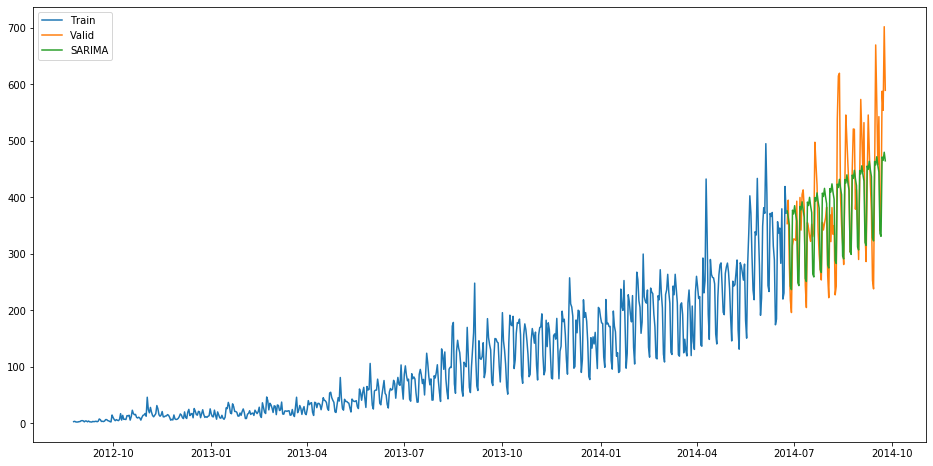

In [54]:
import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

- Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

- Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

- In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.